In [46]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)


per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)


[0]


In [47]:
import tensorflow as tf
from tensorflow import keras
print(tf.version.VERSION)

2.14.0


In [48]:
## Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

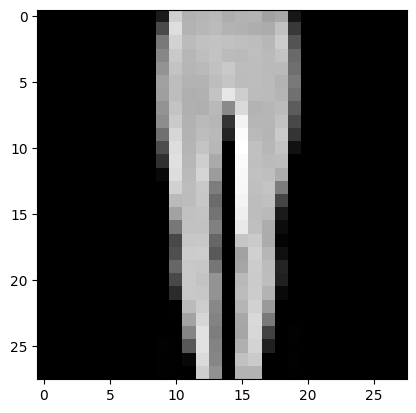

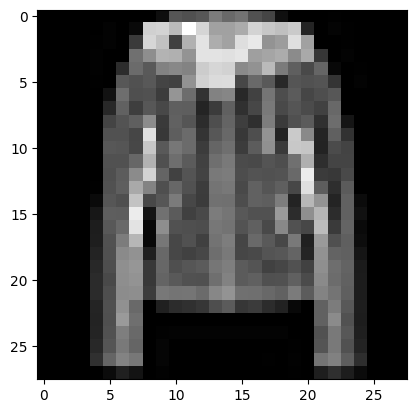

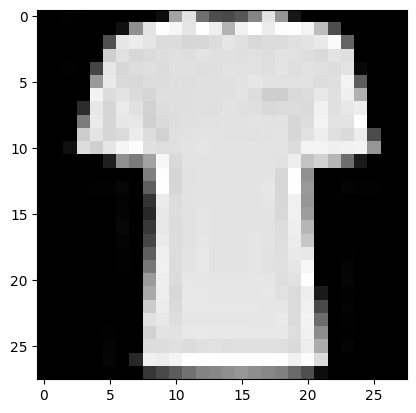

In [49]:
# Plot 3 random images
import matplotlib.pyplot as plt
import random
for i in range(3):
    plt.imshow(X_train_full[random.randint(0, 60000)], cmap='gray')
    plt.show()

In [50]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["camiseta", "pantalon", "jersey", "vestido", "abrigo", "chancla", "camisa", "zapas", "mochila", "bota"]


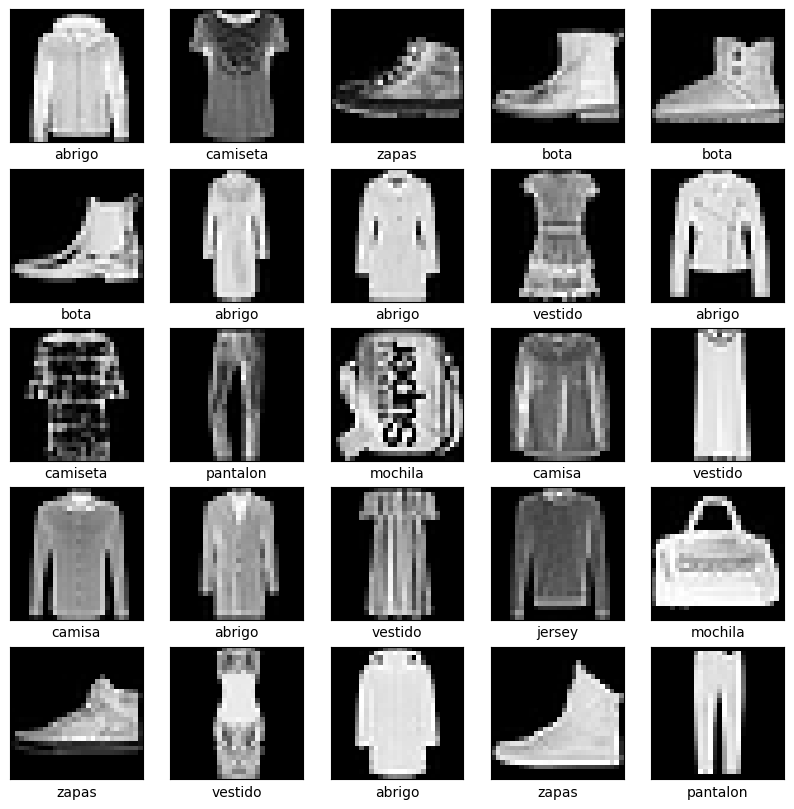

In [51]:
# Show the first 25 images and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Plot a representation of the layers
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7193 - accuracy: 0.7655 - val_loss: 0.5238 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4856 - accuracy: 0.8306 - val_loss: 0.4568 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4403 - accuracy: 0.8462 - val_loss: 0.4411 - val_accuracy: 0.8492
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4141 - accuracy: 0.8549 - val_loss: 0.4036 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3934 - accuracy: 0.8616 - val_loss: 0.3812 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3770 - accuracy: 0.8664 - val_loss: 0.3723 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3643 - accuracy: 0.8706 - val_loss: 0.3835 - val_accuracy:

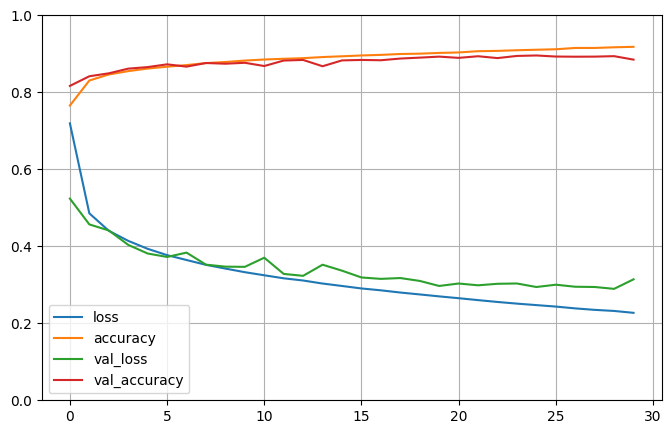

In [54]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.7241 - accuracy: 0.8470


[67.72412872314453, 0.847000002861023]

1/1 [==============================] - 0s 41ms/step
Predicted class: bota


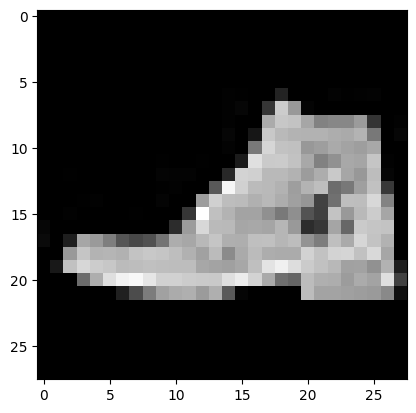

1/1 [==============================] - 0s 13ms/step
Predicted class: chancla


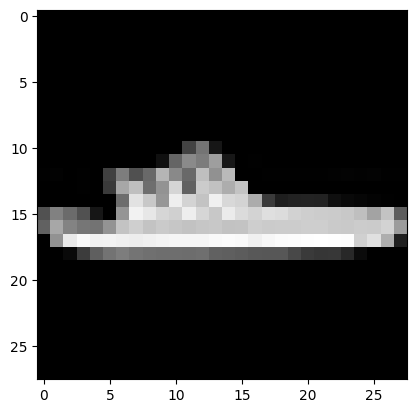

1/1 [==============================] - 0s 13ms/step
Predicted class: bota


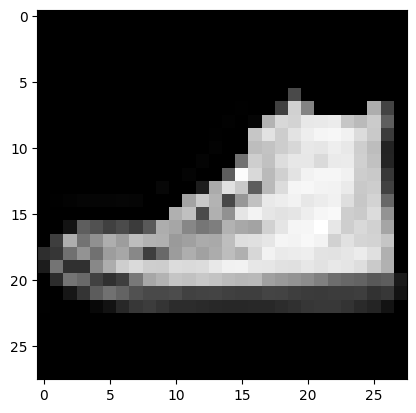

1/1 [==============================] - 0s 14ms/step
Predicted class: camiseta


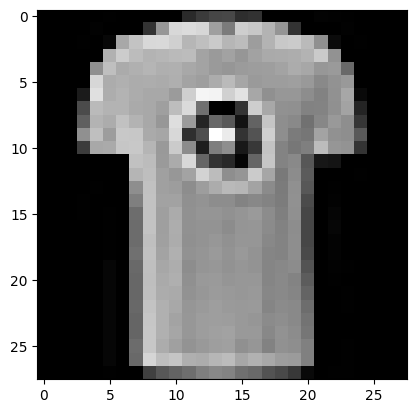

1/1 [==============================] - 0s 14ms/step
Predicted class: pantalon


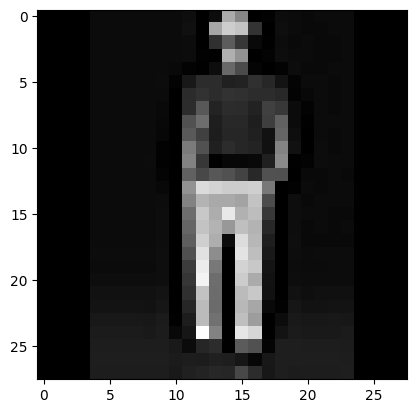

In [56]:
# Get 5 random images and print the real and predicted class

for i in range(5):
    img = X_test[random.randint(0, 10000)]
    img = img.reshape(1, 28, 28)
    y_pred = model.predict(img)
    print(f"Predicted class: {class_names[np.argmax(y_pred)]}")
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()
    

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9702 - val_loss: 0.5640
Epoch 2/20
363/363 [==============================] - 0s 997us/step - loss: 0.6373 - val_loss: 0.5002
Epoch 3/20
363/363 [==============================] - 0s 903us/step - loss: 0.4925 - val_loss: 0.4635
Epoch 4/20
363/363 [==============================] - 0s 950us/step - loss: 0.4696 - val_loss: 0.4511
Epoch 5/20
363/363 [==============================] - 0s 948us/step - loss: 0.4520 - val_loss: 0.4388
Epoch 6/20
363/363 [==============================] - 0s 928us/step - loss: 0.4425 - val_loss: 0.4342
Epoch 7/20
363/363 [==============================] - 0s 975us/step - loss: 0.4330 - val_loss: 0.4274
Epoch 8/20
363/363 [==============================] - 0s 970us/step - loss: 0.4249 - val_loss: 0.4193
Epoch 9/20
363/363 [==============================] - 0s 994us/step - loss: 0.4183 - val_loss: 0.4200
Epoch 10/20
363/363 [==============================] - 0s 935us/step - loss: 0.4130 

1/1 [==============================] - 0s 29ms/step


In [61]:
# Wide and Deep model

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [62]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [63]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 991us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s

1/1 [==============================] - 0s 35ms/step


## Fine-tuning

In [70]:
from tensorflow import keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

model = build_model()

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 0s 917us/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 0s 969us/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 0s 950us/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 967us/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 0s 982us/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 989us/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 0s 942us/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 0s 956us/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 0s 971us/step - loss: nan - val_loss: nan


In [71]:
mst_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 27ms/step


In [85]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

rnd_search_cv = RandomizedSearchCV(KerasRegressor(build_model), param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 0s 979us/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 0s 974us/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 980us/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 969us/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 0s 972us/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 0s 999us/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 0s 998us/step - loss: nan - val_loss: nan


ValueError: Invalid parameter learning_rate for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(learning_rate=0.005836224836709784)`
Check the list of available parameters with `estimator.get_params().keys()`